In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import time

Solving...
$$\frac{\partial^2 V}{\partial x^2}+\frac{\partial^2 V}{\partial y^2}+\frac{\partial^2 V}{\partial z^2}=0,$$
and the boundary conditions are
$$V(x=0,y,z)=V_0\frac{y}{b}\left(1-\frac{y}{b}\right)\frac{z}{c}\left(1-\frac{z}{c}\right),$$
$$V(x=a,y,z)=V_1,$$
$$V(x,y=0,z)=0,$$
$$V(x,y=b,z)=0,$$
$$V(x,y,z=0)=0,$$
$$V(x,y,z=c)=0,$$

In [2]:
a=1.0
b=1.0
c=1.0
V0=1.0
V1=-1.0

dx=1.0/50
dy=dx
dz=dx

nx=int(a/dx)
ny=int(b/dy)
nz=int(c/dz)

x0=np.linspace(0.0,a,nx+1)
y0=np.linspace(0.0,b,ny+1)
z0=np.linspace(0.0,c,nz+1)

x,y,z=np.meshgrid(x0,y0,z0)
print(x.shape)

x=np.transpose(x,(2,0,1))
y=np.transpose(y,(2,0,1))
z=np.transpose(z,(2,0,1))
print(x.shape)

# Initial guess for the solution
V=np.zeros_like(x)

# Apply boundary conditions
V[:,:,0]=V0*(y[:,:,0]/b)*(1-(y[:,:,0]/b))*(z[:,:,0]/c)*(1-(z[:,:,0]/c)) # x=0
V[:,:,-1]=V1 # x=a
V[:,0,:]=0 # y=0
V[:,-1,:]=0 # y=b
V[0,:,:]=0 # z=0
V[-1,:,:]=0 # z=c

eps=1.0e-6

V1=np.copy(V)
V1[1:-1,1:-1,1:-1]=1.0/6.0*(V[0:-2,1:-1,1:-1]+V[2:,1:-1,1:-1]+V[1:-1,0:-2,1:-1]+V[1:-1,2:,1:-1]+V[1:-1,1:-1,0:-2]+V[1:-1,1:-1,2:])
resid=np.sum(np.fabs(V1-V)) # calculate the initial residual
resid0=resid
V=np.copy(V1)

start=time.time()
it=0
while (resid/resid0>eps):
    V1[1:-1,1:-1,1:-1]=1.0/6.0*(V[0:-2,1:-1,1:-1]+V[2:,1:-1,1:-1]+V[1:-1,0:-2,1:-1]+V[1:-1,2:,1:-1]+V[1:-1,1:-1,0:-2]+V[1:-1,1:-1,2:])
    resid=np.sum(np.fabs(V1-V))
    V=np.copy(V1)
    it=it+1
end=time.time()
print("Number of iterations:",it)
print("The time spent is",end-start,"s")

(51, 51, 51)
(51, 51, 51)
Number of iterations: 5487
The time spent is 3.4384560585021973 s


x= 0.5


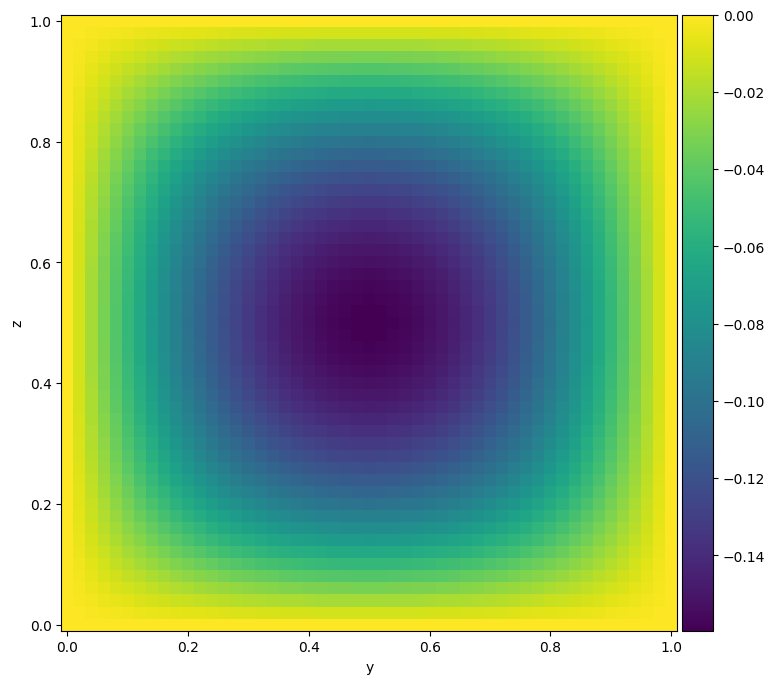

In [3]:
print('x=',x0[nx//2])
fig=plt.figure(figsize=(9,8))
ax=fig.add_subplot(111)
im=plt.pcolormesh(y0,z0,V[:,:,nx//2])
ax.set_aspect('equal')
plt.xlabel("y")
plt.ylabel("z")
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im, cax=cax)
plt.show()

x= 0.24


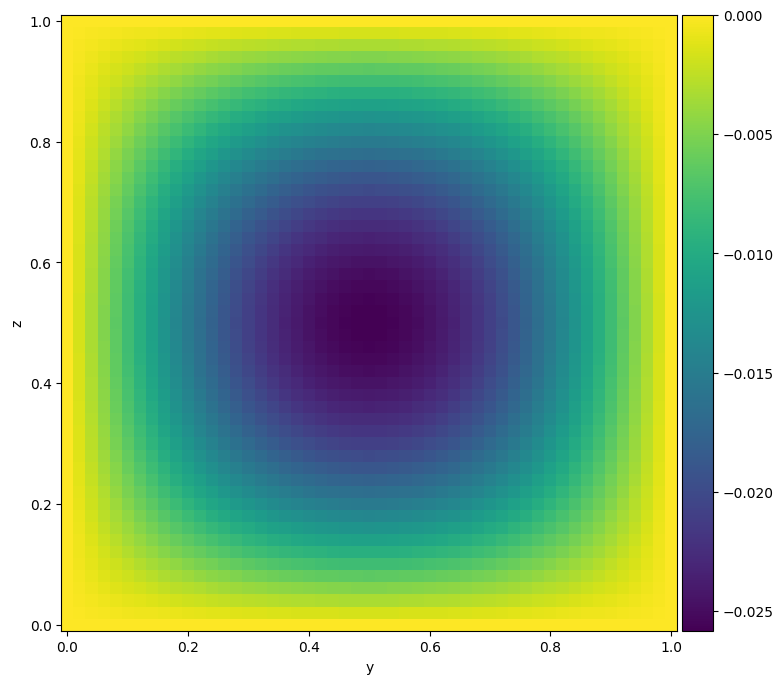

In [4]:
print('x=',x0[nx//4])
fig=plt.figure(figsize=(9,8))
ax=fig.add_subplot(111)
im=plt.pcolormesh(y0,z0,V[:,:,nx//4])
ax.set_aspect('equal')
plt.xlabel("y")
plt.ylabel("z")
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im, cax=cax)
plt.show()

x= 0.9


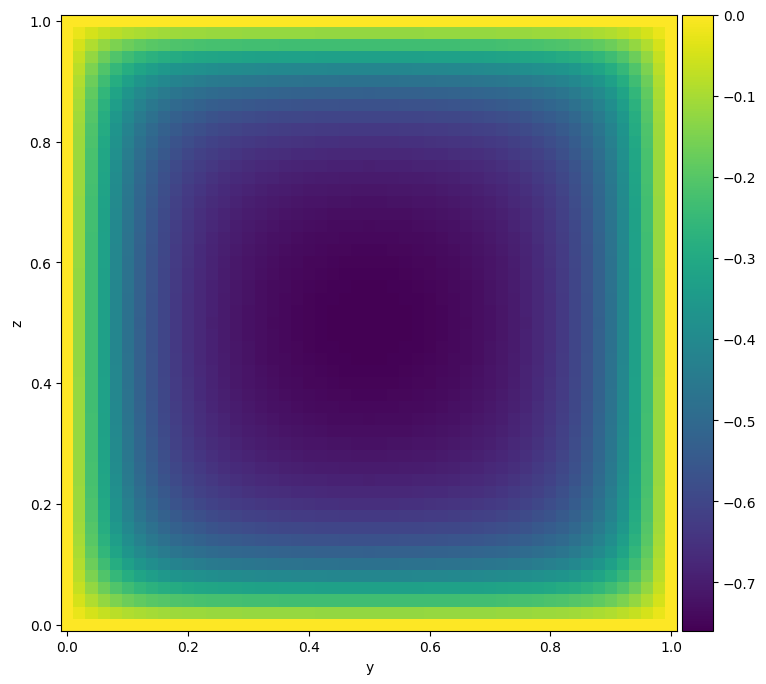

In [5]:
print('x=',x0[9*nx//10])
fig=plt.figure(figsize=(9,8))
ax=fig.add_subplot(111)
im=plt.pcolormesh(y0,z0,V[:,:,9*nx//10])
ax.set_aspect('equal')
plt.xlabel("y")
plt.ylabel("z")
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im, cax=cax)
plt.show()

x= 0.1


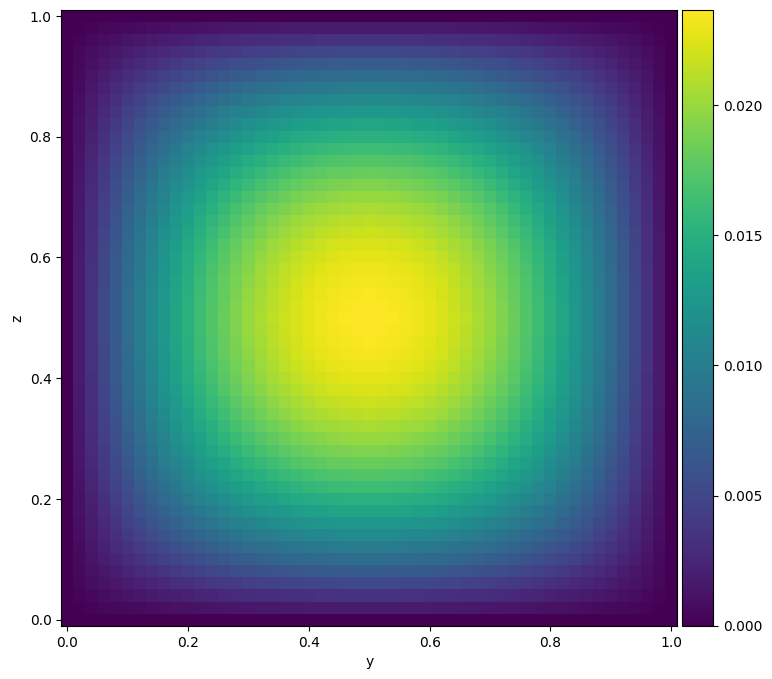

In [6]:
print('x=',x0[nx//10])
fig=plt.figure(figsize=(9,8))
ax=fig.add_subplot(111)
im=plt.pcolormesh(y0,z0,V[:,:,nx//10])
ax.set_aspect('equal')
plt.xlabel("y")
plt.ylabel("z")
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im, cax=cax)
plt.show()

x= 0.5


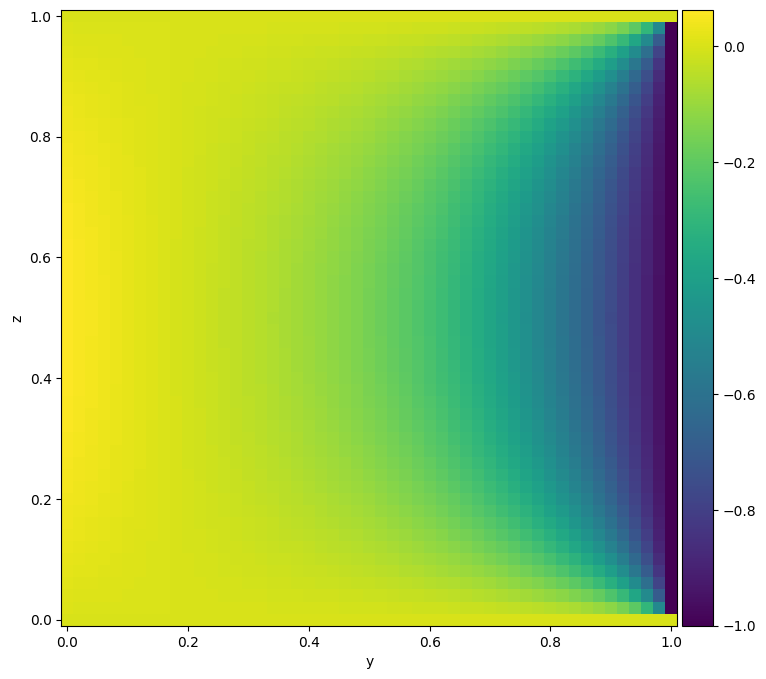

In [7]:
print('x=',z0[nz//2])
fig=plt.figure(figsize=(9,8))
ax=fig.add_subplot(111)
im=plt.pcolormesh(y0,z0,V[nz//2,:,:])
ax.set_aspect('equal')
plt.xlabel("y")
plt.ylabel("z")
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im, cax=cax)
plt.show()

In [8]:
import k3d
plt_marching1 = k3d.marching_cubes(V, level=0.0,
                                  color=0x008000, # green
                                  opacity=0.25,
                                  xmin=np.amin(x0), xmax=np.amax(x0),
                                  ymin=np.amin(y0), ymax=np.amax(y0),
                                  zmin=np.amin(z0), zmax=np.amax(z0),
                                  compression_level=9,
                                  flat_shading=False)
plt_marching2 = k3d.marching_cubes(V, level=0.5,
                                  color=0xFFFF00, # yellow
                                  opacity=0.25,
                                  xmin=np.amin(x0), xmax=np.amax(x0),
                                  ymin=np.amin(y0), ymax=np.amax(y0),
                                  zmin=np.amin(z0), zmax=np.amax(z0),
                                  compression_level=9,
                                  flat_shading=False)
plt_marching3 = k3d.marching_cubes(V, level=-0.5,
                                  color=0x0000FF, # blue
                                  opacity=0.25,
                                  xmin=np.amin(x0), xmax=np.amax(x0),
                                  ymin=np.amin(y0), ymax=np.amax(y0),
                                  zmin=np.amin(z0), zmax=np.amax(z0),
                                  compression_level=9,
                                  flat_shading=False)


plot = k3d.plot()
plot += plt_marching1
plot += plt_marching2
plot += plt_marching3
plot.display()

/home/jeremy/.local/lib/python3.10/site-packages/traittypes/traittypes.py:97: UserWarning: Given trait value dtype "float64" does not match required type "float32". A coerced copy has been created.
  warnings.warn(


Output()

/tmp/ipykernel_5277/4198199611.py:26: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


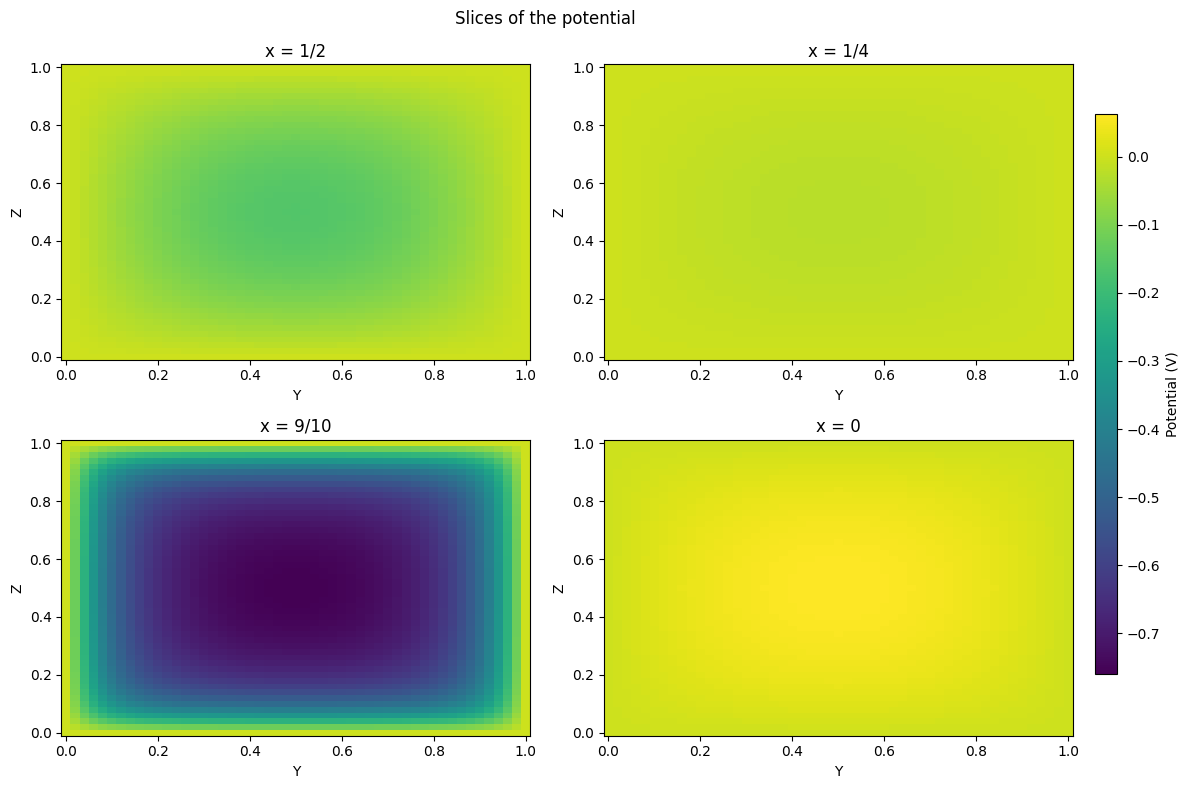

In [36]:
# // means integer division (floor division)
slices_x = [nx // 2, nx // 4, 9 * nx // 10, 0]
slice_x_labels = ["x = 1/2", "x = 1/4", "x = 9/10", "x = 0"]

# Calculate the global minimum and maximum values across all slices
vmin = np.min([np.min(V[:, :, slice_x]) for slice_x in slices_x])
vmax = np.max([np.max(V[:, :, slice_x]) for slice_x in slices_x])

# Create separate colormesh plots for each selected slice
fig, axes = plt.subplots(2, 2, figsize=(11, 8))

fig.suptitle("Slices of the potential")

for i, slice_x in enumerate(slices_x):
    ax = axes[i // 2, i % 2]
    im = ax.pcolormesh(y0, z0, V[:, :, slice_x], vmin=vmin, vmax=vmax, cmap='viridis')
    ax.set_title(slice_x_labels[i])
    ax.set_xlabel('Y')
    ax.set_ylabel('Z')

# Create a common colorbar to the right
cbar_ax = fig.add_axes([1, 0.15, 0.02, 0.7])  # Adjust the position of the colorbar
cbar = plt.colorbar(im, cax=cbar_ax)
cbar.set_label('Potential (V)')

plt.tight_layout()
plt.show()